In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
creditcard_data = pd.read_csv("creditcard.csv")

In [ ]:
# Basic Exploration
print(creditcard_data.shape)
print(creditcard_data.head(6))
print(creditcard_data.tail(6))
print(creditcard_data['Class'].value_counts())
print(creditcard_data['Amount'].describe())
print(creditcard_data.columns)
print(creditcard_data['Amount'].var())
print(creditcard_data['Amount'].std())



In [4]:
# Feature Scaling
creditcard_data['Amount'] = (creditcard_data['Amount'] - creditcard_data['Amount'].mean()) / creditcard_data['Amount'].std()

# Prepare the data
NewData = creditcard_data.drop(columns=['Time'])  # Assuming 'Time' is the first column
print(NewData.head())

In [6]:
# Splitting the data
X = NewData.drop('Class', axis=1)
y = NewData['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)



         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [ ]:
# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
lr_predictions = logistic_model.predict_proba(X_test)[:,1]

In [ ]:
# Plotting ROC Curve for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, lr_predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression AUC = {roc_auc:.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Decision Tree Model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
dt_predictions = decision_tree_model.predict_proba(X_test)[:,1]

In [11]:
# Neural Network Model
ann_model = MLPClassifier()
ann_model.fit(X_train, y_train)
ann_predictions = ann_model.predict_proba(X_test)[:,1]

In [ ]:
# Light GBM Model
lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=3, num_leaves=31, min_data_in_leaf=100, subsample=0.5)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict_proba(X_test)[:, 1]

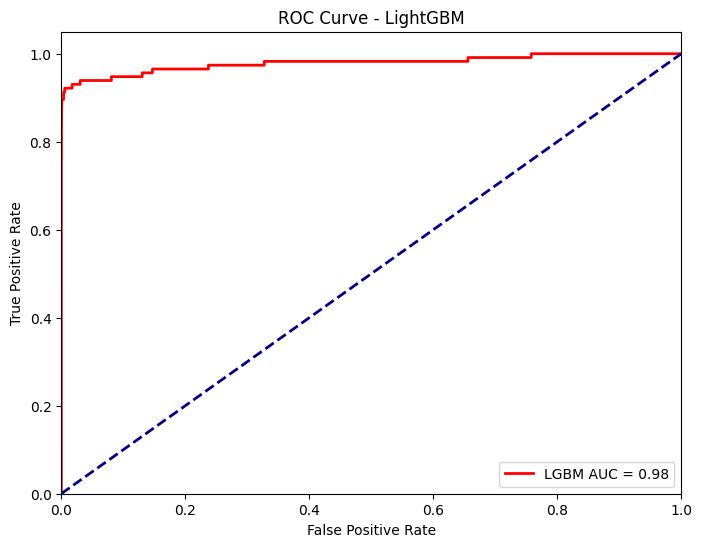

In [16]:
# Plotting ROC Curve for LightGBM
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, lgbm_predictions)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='red', lw=2, label=f'LGBM AUC = {roc_auc_lgbm:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.show()

In [17]:
# Print AUC values
print(f'Logistic Regression AUC: {roc_auc:.2f}')
print(f'LightGBM AUC: {roc_auc_lgbm:.2f}')

Logistic Regression AUC: 0.98
LightGBM AUC: 0.98
